# CSV with valid images

## Set-up

In [ ]:
# !pip show fastai
# !pip install fastai==1.0.61

In [ ]:
# You will need to run this each time you restart the notebook.
!pip install "torch==1.4" "torchvision==0.5.0"

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
!ls '/gdrive/My Drive/Labeling/Scripts/'

AddRoughnessMetric  Autolabeling.ipynb	Other  ValidImages.ipynb


In [ ]:
from fastai.vision import *
import pandas as pd
import os
import shutil

## Plug all images into the model

#### Load the model

In [ ]:
np.random.seed(42)
data = (ImageList
        .from_folder(path='/gdrive/My Drive/Labeling/PathDetectionClassifier/PathDetectionImages')
        .split_by_rand_pct(0.2)
        .label_from_folder()
        .transform(get_transforms(do_flip=False), size=(128))
        .databunch()
        .normalize())
bs = 64
arch = models.resnet34
learn = cnn_learner(data, arch, metrics=[accuracy, error_rate])

In [ ]:
learn.load('/gdrive/My Drive/Labeling/PathDetectionClassifier/Models/charlie_fine_tuned_version_1')

Learner(data=ImageDataBunch;

Train: LabelList (368 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Path,Path,Path,Path,Path
Path: /gdrive/My Drive/Labeling/PathDetectionClassifier/PathDetectionImages;

Valid: LabelList (92 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Path,Path,Path,Sunlight,Path
Path: /gdrive/My Drive/Labeling/PathDetectionClassifier/PathDetectionImages;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1)

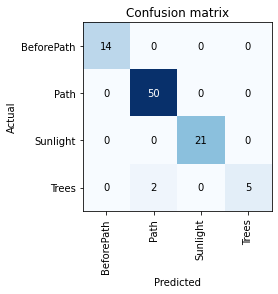

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

#### Plug all the images into the model

In [ ]:
image_path = '/gdrive/My Drive/Labeling/Model/Images'
print(len(os.listdir(image_path)))

8983


In [ ]:
output_dir = '/gdrive/My Drive/Labeling/PathDetectionClassifier/PredictImages'

https://forums.fast.ai/t/how-do-we-use-our-model-against-a-specific-image/7661/4?u=binga

In [ ]:
predictions = pd.DataFrame()
images = []
preds = []

count = 0
for filename in os.listdir(image_path):
  infile = os.path.join(image_path, filename)
  if os.path.isdir(infile):
    continue
  
  count += 1
  if count % 100 == 0:
    print(count, '/', len(os.listdir(image_path)))
  
  img = open_image(infile)
  pred = learn.predict(img)
  label = str(pred[0])

  outfile = os.path.join(output_dir, label, filename)
  shutil.copyfile(infile, outfile)

  images.append(filename)
  preds.append(label)

predictions['image'] = images
predictions['category'] = preds

100 / 8983
200 / 8983
300 / 8983
400 / 8983
500 / 8983
600 / 8983
700 / 8983
800 / 8983
900 / 8983
1000 / 8983
1100 / 8983
1200 / 8983
1300 / 8983
1400 / 8983
1500 / 8983
1600 / 8983
1700 / 8983
1800 / 8983
1900 / 8983
2000 / 8983
2100 / 8983
2200 / 8983
2300 / 8983
2400 / 8983
2500 / 8983
2600 / 8983
2700 / 8983
2800 / 8983
2900 / 8983
3000 / 8983
3100 / 8983
3200 / 8983
3300 / 8983
3400 / 8983
3500 / 8983
3600 / 8983
3700 / 8983
3800 / 8983
3900 / 8983
4000 / 8983
4100 / 8983
4200 / 8983
4300 / 8983
4400 / 8983
4500 / 8983
4600 / 8983
4700 / 8983
4800 / 8983
4900 / 8983
5000 / 8983
5100 / 8983
5200 / 8983
5300 / 8983
5400 / 8983
5500 / 8983
5600 / 8983
5700 / 8983
5800 / 8983
5900 / 8983
6000 / 8983
6100 / 8983
6200 / 8983
6300 / 8983
6400 / 8983
6500 / 8983
6600 / 8983
6700 / 8983
6800 / 8983
6900 / 8983
7000 / 8983
7100 / 8983
7200 / 8983
7300 / 8983
7400 / 8983
7500 / 8983
7600 / 8983
7700 / 8983
7800 / 8983
7900 / 8983
8000 / 8983
8100 / 8983
8200 / 8983
8300 / 8983
8400 / 8983
8

In [ ]:
predictions.head()

,image,category
0,970329236s711ms.jpg,Path
1,970329237s712ms.jpg,Path
2,970329238s713ms.jpg,Path
3,970329239s714ms.jpg,Path
4,970329240s715ms.jpg,Sunlight


In [ ]:
predictions.to_csv(os.path.join(output_dir, 'predicted_image_categories.csv'))

In [ ]:
print(len(os.listdir(os.path.join(output_dir, 'Path'))))
print(len(os.listdir(os.path.join(output_dir, 'BeforePath'))))
print(len(os.listdir(os.path.join(output_dir, 'Sunlight'))))
print(len(os.listdir(os.path.join(output_dir, 'Trees'))))

8011
74
154
743


#### Updated roughness label CSV

In [ ]:
path_csv = pd.read_csv('/gdrive/My Drive/Labeling/PathDetectionClassifier/PredictImages/predicted_image_categories.csv')
path_csv = path_csv[path_csv['category'] == 'Path']
image_names = path_csv['image']
image_names = image_names.unique()
print(len(image_names))

8011


In [ ]:
roughness_csv = pd.read_csv('/gdrive/My Drive/Labeling/Model/v1/labels.csv')
in_image_names = roughness_csv['image'].apply(lambda i: i in image_names)
filtered = roughness_csv[in_image_names]
print(len(filtered))
filtered.to_csv('/gdrive/My Drive/Labeling/Model/v3/filtered_labels.csv')

8011
